In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Data Files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read Data
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine two dataframes into one

df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")
df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

df_2 = df[df.duplicated(['Mouse ID', 'Timepoint'])]
df_2


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [3]:
# Getting the duplicate mice.
df.iloc[908:920,:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Remove duplicated time entries for mouse g989
mask2 = df["Mouse ID"] != "g989"
df_2 = df.loc[mask2].reset_index(drop=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



tumorMean = df_2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumorMedian = df_2.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumorVariance = df_2.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumorStddev = df_2.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumorSEM = df_2.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summaryTable_df = pd.DataFrame()
summaryTable_df["Tumor Volume Mean"] = tumorMean
summaryTable_df["Tumor Volume Median"] = tumorMedian
summaryTable_df["Tumor Volume Variance"] = tumorVariance 
summaryTable_df["Tumor Volume Standard Deviation"] = tumorStddev
summaryTable_df["Tumor Volume Standard Error"] = tumorSEM

summaryTable_df







,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

df_2.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])




,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Charts

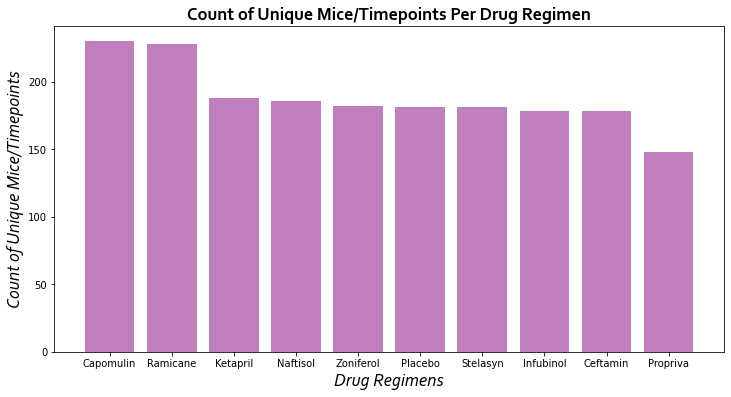

In [7]:
#Matplotlib Bar Graph of Count of Unique Mice/Timepoints

barPlotdata = df_2["Drug Regimen"].value_counts()
x_axis = barPlotdata.index
y_axis = barPlotdata.values


plt.figure(figsize=(12,6))
plt.bar(x_axis, y_axis, color = '#800080', alpha=0.5, align="center")
plt.title("Count of Unique Mice/Timepoints Per Drug Regimen",fontweight="bold",fontsize=18, fontname='Corbel')
plt.xlabel("Drug Regimens",fontstyle='italic',fontsize=18, fontname='Corbel')
plt.ylabel("Count of Unique Mice/Timepoints",fontstyle='italic',fontsize=18, fontname='Corbel')

plt.show()


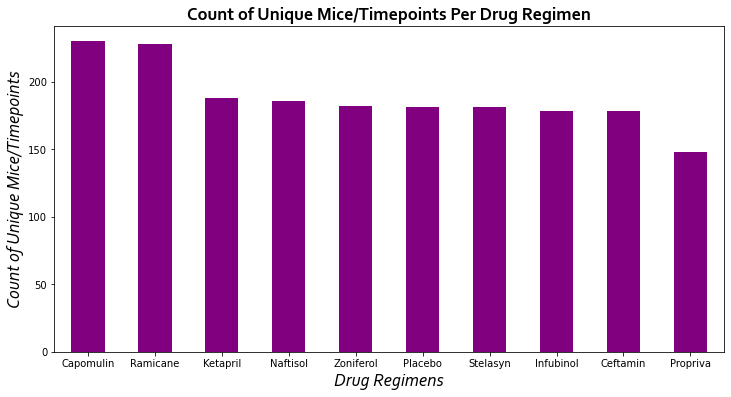

In [8]:
#Pandas Bar Graph of Count of Unique Mice/Timepoints

plt.figure(figsize=(12,6))
df_2["Drug Regimen"].value_counts().plot(kind='bar',color='#800080')

plt.title("Count of Unique Mice/Timepoints Per Drug Regimen",fontweight="bold",fontsize=18, fontname='Corbel')
plt.xlabel("Drug Regimens",fontstyle='italic',fontsize=18, fontname='Corbel')
plt.ylabel("Count of Unique Mice/Timepoints",fontstyle='italic',fontsize=18, fontname='Corbel')
plt.xticks(rotation=0)

plt.show()


In [9]:
#Matplotlib Pie Chart of Male Versus Female Mice

genderCounts=df_2.groupby(["Sex", "Mouse ID"]).size().reset_index().Sex.value_counts()
genderCounts

Male      125
Female    123
Name: Sex, dtype: int64

# Pie Charts

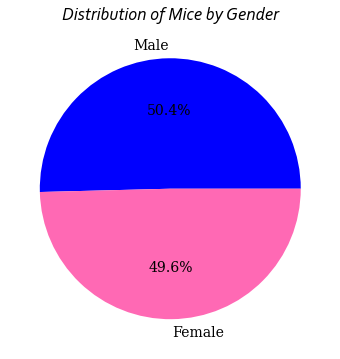

In [10]:
#Matplotlib Pie Chart of Male Versus Female Counts of Mice

plt.figure(figsize=(12,6))

genderCounts=df_2.groupby(["Sex", "Mouse ID"]).size().reset_index().Sex.value_counts()
size = genderCounts.values
labels = genderCounts.index
colors = ["Blue","HotPink"]
plt.pie(size, colors=colors,labels=labels, autopct="%1.1f%%",textprops={'fontsize': 14, 'fontname' : 'serif'},shadow=False)

plt.title("Distribution of Mice by Gender",fontstyle='italic',fontsize=18, fontname='Corbel')

plt.show()

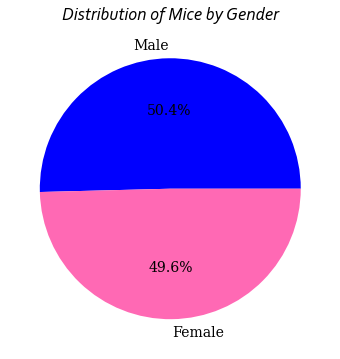

In [11]:
#Pandas Pie Chart of Male Versus Female Counts of Mice

genderCounts=df_2.groupby(["Sex", "Mouse ID"]).size().reset_index().Sex.value_counts().plot.pie(y='Sex',colors=colors,figsize=(12, 6),autopct="%1.1f%%",textprops={'fontsize': 14, 'fontname' : 'serif'},shadow=False)
labels = ["Male","Female"]
colors = ["Blue","HotPink"]
plt.axis('off')

plt.title("Distribution of Mice by Gender",fontstyle='italic',fontsize=18, fontname='Corbel')

plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
df_treatments = df_2.loc[df_2["Drug Regimen"].isin(regimens)].reset_index(drop=True)


# Start by getting the last (greatest) timepoint for each mouse
df_treatments.groupby("Mouse ID").max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,45.466677,1
a444,Ramicane,Female,10,25,45,45.000000,0
...,...,...,...,...,...,...,...
y769,Ceftamin,Female,6,27,45,68.594745,4
y793,Capomulin,Male,17,17,45,45.000000,2
y865,Ceftamin,Male,23,26,45,64.729837,3


In [13]:
maxTimepoint = df_treatments.groupby("Mouse ID").Timepoint.max().reset_index()
maxTimepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [14]:
 df_regimen =  pd.DataFrame()

for indx, row in maxTimepoint.iterrows():
    mask = ((df_treatments["Mouse ID"] == row["Mouse ID"]) & (df_treatments["Timepoint"] == row["Timepoint"]))
    foundEntry = df_treatments.loc[mask]
    df_regimen = df_regimen.append(foundEntry)
    
df_regimen = df_regimen.reset_index(drop=True)
df_regimen

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,Female,6,27,45,68.594745,4
96,y793,Capomulin,Male,17,17,45,31.896238,2
97,y865,Ceftamin,Male,23,26,45,64.729837,3
98,z578,Ramicane,Male,11,16,45,30.638696,0


In [15]:
df_regimen2 = df_2.merge(maxTimepoint, on=["Mouse ID", "Timepoint"])
df_regimen2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [16]:

drug_datalist = []

print(f"Quartile, Median, and Possible Outlying Data Points of Tumor Volumes by Drug Regimen")

for drugs in ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]:
    found = df_regimen2.loc[df_regimen2["Drug Regimen"] == drugs, "Tumor Volume (mm3)"]
    
    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = found.quantile([.25,.5,.75])
    lowerQuartile = quartiles[0.25]
    upperQuartile = quartiles[0.75]
    interQuartile = upperQuartile-lowerQuartile
    
   
    print()
    print(drugs)
    print()
    print(f"The lower quartile of Tumor Volumes (mm3) is: {lowerQuartile}")
    print(f"The upper quartile of Tumor Volumes (mm3) is: {upperQuartile}")
    print(f"The interquartile range of Tumor Volumes (mm3) is: {interQuartile}")
    print(f"The the median of Tumor Volumes (mm3) is: {quartiles[0.5]} ")

    lowerLimit = lowerQuartile - (1.5* interQuartile)
    upperLimit = upperQuartile + (1.5* interQuartile)
    print(f"Tumor Volumes (mm3) below {lowerLimit} may be outliers.")
    print(f"Tumor Volumes (mm3) above {upperLimit} may be outliers.")
    
    print()


    drug_datalist.append(found.values)

Quartile, Median, and Possible Outlying Data Points of Tumor Volumes by Drug Regimen

Capomulin

The lower quartile of Tumor Volumes (mm3) is: 32.37735684
The upper quartile of Tumor Volumes (mm3) is: 40.1592203
The interquartile range of Tumor Volumes (mm3) is: 7.781863460000004
The the median of Tumor Volumes (mm3) is: 38.125164399999996 
Tumor Volumes (mm3) below 20.70456164999999 may be outliers.
Tumor Volumes (mm3) above 51.83201549 may be outliers.


Ceftamin

The lower quartile of Tumor Volumes (mm3) is: 48.72207785
The upper quartile of Tumor Volumes (mm3) is: 64.29983003
The interquartile range of Tumor Volumes (mm3) is: 15.577752179999997
The the median of Tumor Volumes (mm3) is: 59.85195552 
Tumor Volumes (mm3) below 25.355449580000002 may be outliers.
Tumor Volumes (mm3) above 87.66645829999999 may be outliers.


Infubinol

The lower quartile of Tumor Volumes (mm3) is: 54.04860769
The upper quartile of Tumor Volumes (mm3) is: 65.52574285
The interquartile range of Tumor Vol

# Box Plots

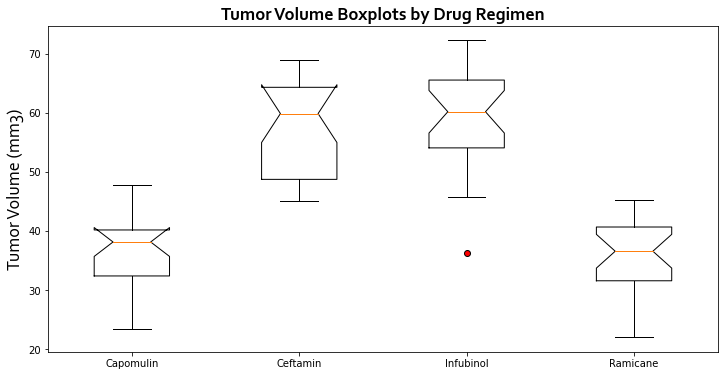

In [17]:
plt.figure(figsize=(12,6))

plt.boxplot(drug_datalist, labels = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"], notch=True,flierprops=dict(color='r', markerfacecolor='r'))

plt.title('Tumor Volume Boxplots by Drug Regimen',fontweight="bold",fontsize=18, fontname='Corbel')
plt.ylabel('Tumor Volume (mm3)',fontsize=18, fontname='Corbel')

plt.show()

## Scatter Plots

<ipython-input-18-2f734c0f4c6f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tumorWeight_df = df_2.loc[df_2["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()


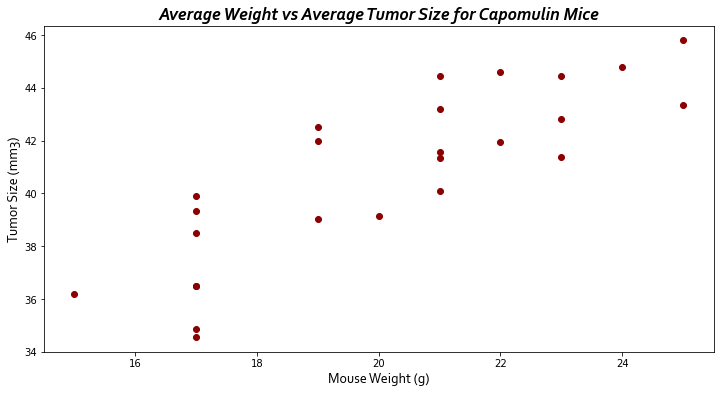

In [18]:
#Scatterplot
tumorWeight_df = df_2.loc[df_2["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()

plt.figure(figsize=(12,6))

plt.scatter(tumorWeight_df["Weight (g)"], tumorWeight_df["Tumor Volume (mm3)"], color = "darkred")
plt.title("Average Weight vs Average Tumor Size for Capomulin Mice", fontstyle = 'italic',fontsize=18, fontweight="bold", fontname = 'Corbel')
plt.xlabel("Mouse Weight (g)", fontsize=14, fontname = 'Corbel')
plt.ylabel("Tumor Size (mm3)", fontsize=14, fontname = 'Corbel')

plt.show()




In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulinMouse = df_2.loc[df_2['Mouse ID'] == "x401"].reset_index(drop=True)
capomulinMouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,x401,Capomulin,Female,16,15,0,45.000000,0
1,x401,Capomulin,Female,16,15,5,45.473753,0
2,x401,Capomulin,Female,16,15,10,39.113891,0
3,x401,Capomulin,Female,16,15,15,39.776250,0
4,x401,Capomulin,Female,16,15,20,36.065835,0
5,x401,Capomulin,Female,16,15,25,36.617120,0
6,x401,Capomulin,Female,16,15,30,32.915292,0
7,x401,Capomulin,Female,16,15,35,30.206825,0
8,x401,Capomulin,Female,16,15,40,28.167397,0
9,x401,Capomulin,Female,16,15,45,28.484033,0


# Line Plot

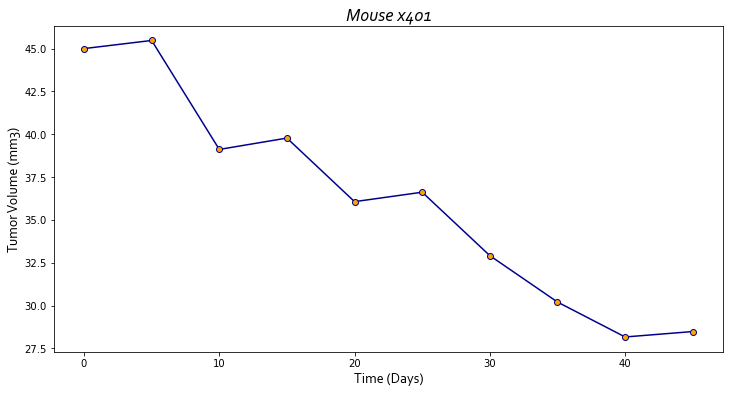

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.figure(figsize=(12,6))

x = capomulinMouse.Timepoint
y = capomulinMouse["Tumor Volume (mm3)"]

plt.plot(x, y, color="darkblue", markerfacecolor='orange', marker='o')

plt.title("Mouse x401", fontstyle='italic',fontsize=18, fontname='Corbel')
plt.xlabel('Time (Days)', fontsize=14, fontname='Corbel')
plt.ylabel("Tumor Volume (mm3)", fontsize=14, fontname='Corbel')

plt.show()

## Correlation

In [21]:
# Correlation
tumorWeight_df.corr()

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


In [22]:
 sts.pearsonr(tumorWeight_df["Weight (g)"], tumorWeight_df["Tumor Volume (mm3)"])

(0.8419363424694717, 1.322572243471279e-07)

# Regression

y = 0.95x + 21.55
The r-squared is: 0.7088568047708717


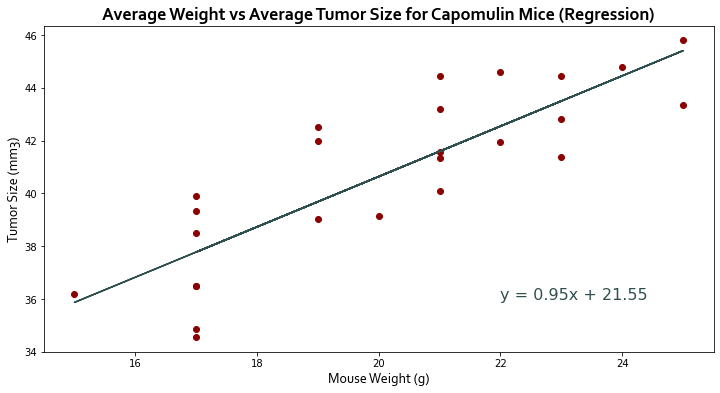

In [23]:
# Regression
x_axis = tumorWeight_df["Weight (g)"]
y_axis = tumorWeight_df["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_axis, y_axis)
regression_values = x_axis * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(equation)
print(f"The r-squared is: {rvalue**2}")

plt.figure(figsize=(12,6))

plt.scatter(x_axis, y_axis, color = "darkred")
plt.title("Average Weight vs Average Tumor Size for Capomulin Mice (Regression)", fontsize=18, fontweight="bold", fontname = 'Corbel')
plt.xlabel("Mouse Weight (g)",fontsize=14, fontname='Corbel')
plt.ylabel("Tumor Size (mm3)",fontsize=14, fontname='Corbel')
plt.plot(x_axis, regression_values, color="darkslategrey")
plt.annotate(equation,(22,36),fontsize=16,color="darkslategrey")

plt.show()